# Assignment 3

## Chloe Barnes

### Due 9/21. Do four of five.

## Problem 1
- Open the NHANES (or Ames prices or college completion datasets, if you prefer)
- Find two categorical variables of interest (there are 198, and short descriptions are given in the `nhanes_meta_17_18.csv` file). Investigate their missing values (you don't have to focus on missing values for this analysis like we did with police use of force, but always be aware of how dirty the data are)
- Compute a contingency table for your categorical $X$ and $Y$
- Discuss any interesting patterns (or lack of one) that you observe

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

In [2]:
data = pd.read_csv("data/nhanes_data_17_18.csv", low_memory=False)
data.head()

,SEQN,GeneralHealthCondition,EverBreastfedOrFedBreastmilk,AgeStoppedBreastfeedingdays,AgeFirstFedFormuladays,AgeStoppedReceivingFormuladays,AgeStartedOtherFoodbeverage,AgeFirstFedMilkdays,TypeOfMilkFirstFedWholeMilk,TypeOfMilkFirstFed2Milk,...,DaysSmokedCigsDuringPast30Days,AvgCigarettesdayDuringPast30Days,TriedToQuitSmoking,TimesStoppedSmokingCigarettes,HowLongWereYouAbleToStopSmoking,UnitOfMeasureDayweekmonthyear_2_SMQ,CurrentSelfreportedHeightInches,CurrentSelfreportedWeightPounds,TriedToLoseWeightInPastYear,TimesLost10LbsOrMoreToLoseWeight
0,93703.0,NaN,1.0,273.0,1.0,365.0,152.0,365.0,Whole or regular milk,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,93704.0,NaN,1.0,60.0,3.0,365.0,126.0,365.0,Whole or regular milk,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,93705.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,63.0,165.0,0.0,11 times or more
3,93706.0,Very good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,68.0,145.0,0.0,Never
4,93707.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


I choose to examine the categorical variables `Gender` and `DoYouNowSmokeCigarettes`. This will allow me to explore potential gender differences in smoking behavior.

In [3]:
total_rows = len(data)
gender_missing = data['Gender'].isna().sum()
gender_missing_percentage = gender_missing / total_rows * 100

smoking_missing = data["DoYouNowSmokeCigarettes"].isna().sum()
smoking_missing_percentage = smoking_missing / total_rows * 100

print(f"Total Participants: {total_rows}")
print(f"Gender Missing: {gender_missing}")
print(f"Gender Missing Percentage: {gender_missing_percentage:.2f}%")
print(f"Smoking Status Missing: {smoking_missing}")
print(f"Smoking Status Missing Percentage: {smoking_missing_percentage:.2f}%")

Total Participants: 8366
Gender Missing: 0
Gender Missing Percentage: 0.00%
Smoking Status Missing: 6134
Smoking Status Missing Percentage: 73.32%


In [4]:
print("Gender Distribution:")
print(data['Gender'].value_counts(dropna=False))

print("\nSmoking Status Distribution:")
print(data["DoYouNowSmokeCigarettes"].value_counts(dropna=False))

Gender Distribution:
Gender
Female    4272
Male      4094
Name: count, dtype: int64

Smoking Status Distribution:
DoYouNowSmokeCigarettes
NaN           6134
Not at all    1260
Every day      763
Some days      209
Name: count, dtype: int64


In [5]:
valid_cases = data.dropna(subset=['Gender', 'DoYouNowSmokeCigarettes'])
print(f"Valid Cases for analysis: {len(valid_cases):,} ({len(valid_cases) / total_rows * 100:.2f}% of total cases)")
contingency_table = pd.crosstab(valid_cases['Gender'], valid_cases['DoYouNowSmokeCigarettes'],
                                margins=True, margins_name='Total')

print("Contingency Table: Gender vs Current Smoking Status")
print(contingency_table)

core_table = pd.crosstab(valid_cases['Gender'], valid_cases['DoYouNowSmokeCigarettes'])

Valid Cases for analysis: 2,232 (26.68% of total cases)
Contingency Table: Gender vs Current Smoking Status
DoYouNowSmokeCigarettes  Every day  Not at all  Some days  Total
Gender                                                          
Female                         321         460         85    866
Male                           442         800        124   1366
Total                          763        1260        209   2232


In [6]:
print("Row Percentages (by gender):")
row_percentages = pd.crosstab(valid_cases['Gender'], valid_cases['DoYouNowSmokeCigarettes'], normalize='index') * 100

print(row_percentages.round(1))

print("\nOverall Percentages:")
overall_percentages = valid_cases['DoYouNowSmokeCigarettes'].value_counts(normalize=True) * 100

print(overall_percentages.round(1))

Row Percentages (by gender):
DoYouNowSmokeCigarettes  Every day  Not at all  Some days
Gender                                                   
Female                        37.1        53.1        9.8
Male                          32.4        58.6        9.1

Overall Percentages:
DoYouNowSmokeCigarettes
Not at all    56.5
Every day     34.2
Some days      9.4
Name: proportion, dtype: float64


From my observations of the data, Males are more likely to be non-smokers, (58.6% for Males vs 53.1% for Females). Females are more likely to be daily smokers (37.1% for Females vs 32.4% for Males).

Some Caveats:
- There is a gender imbalance within the smoking subsample, with 61.2% being males vs only 38.8% being females.
- There is a high rate of missing smoking data, with only 26.7% of the total particiants having valid data for the smoking subsample. 

## Problem 2
- Open the NHANES dataset
- Find a categorical and numeric variable of interest (there are 198, and short descriptions are given in the `nhanes_meta_17_18.csv` file). Investigate their missing values (you don't have to focus on missing values for this analysis, but always be aware of them)
- Make descriptive tables and grouped kernel density plots to represent the variation in your numeric $Y$ conditional on your categorical $X$
- Discuss any interesting patterns (or lack of one) that you observe

For this problem, I analyzed the variables `GeneralHealthCondition' and 'BodyMassIndexKgm2'. For this, I could explore whether self-reported health status relates to objective health measures.

In [7]:
# Examine categorical variable
print("General Health Condition Distribution:")
health_counts = data['GeneralHealthCondition'].value_counts(dropna=False)
print(health_counts)
print('\nPercentage Distribution:')
health_percentages = data['GeneralHealthCondition'].value_counts(normalize=True, dropna=False) * 100
print(health_percentages.round(1))

# Examine numerical variable
print("\nBMI Summary Statistics:")
bmi_stats = data['BodyMassIndexKgm2'].describe().round(1)
print(bmi_stats)

print(f'\nBMI Outlier Analysis:')
q1, q3 = data['BodyMassIndexKgm2'].quantile([0.25, 0.75])
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = data[data['BodyMassIndexKgm2'] < lower_bound] | data[data['BodyMassIndexKgm2'] > upper_bound]
print(f'Number of Outliers: {len(outliers)} ({len(outliers) / len(data) * 100:.1f}%)')
print(f'Outlier Percentage: {len(outliers) / len(data) * 100:.2f}%')

General Health Condition Distribution:
GeneralHealthCondition
Good         2454
NaN          2402
Very good    1544
Fair or      1175
Excellent     619
Poor?         172
Name: count, dtype: int64

Percentage Distribution:
GeneralHealthCondition
Good         29.3
NaN          28.7
Very good    18.5
Fair or      14.0
Excellent     7.4
Poor?         2.1
Name: proportion, dtype: float64

BMI Summary Statistics:
count    8005.0
mean       26.6
std         8.3
min        12.3
25%        20.4
50%        25.8
75%        31.3
max        86.2
Name: BodyMassIndexKgm2, dtype: float64

BMI Outlier Analysis:
Number of Outliers: 147 (1.8%)
Outlier Percentage: 1.76%


In [9]:
print('MISSING VALUE ANALYSIS:\n')

total_rows = len(data)

health_missing = data['GeneralHealthCondition'].isna().sum()
bmi_missing = data['BodyMassIndexKgm2'].isna().sum()

health_missing_percentage = health_missing / total_rows * 100
bmi_missing_percentage = bmi_missing / total_rows * 100

print(f"Total Participants: {total_rows:,}")
print(f"General Health Condition Missing: {health_missing}, ({health_missing_percentage:.1f}%)")
print(f"Body Mass Index Missing: {bmi_missing}, ({bmi_missing_percentage:.1f}%)")

valid_cases = data.dropna(subset=['GeneralHealthCondition', 'BodyMassIndexKgm2']).copy()
valid_count = len(valid_cases)
valid_percentage = valid_count / total_rows * 100

print(f"\nTotal Valid (Non-missing) Cases: {valid_count:,} ({valid_percentage:.2f}% of total cases)")

MISSING VALUE ANALYSIS:

Total Participants: 8,366
General Health Condition Missing: 2402, (28.7%)
Body Mass Index Missing: 361, (4.3%)

Total Valid (Non-missing) Cases: 5,892 (70.43% of total cases)


In [10]:
print("DESCRIPTIVE TABLES\n")

print("BMI Statistics by General Health Condition:")
bmi_by_health = (
    valid_cases
    .groupby('GeneralHealthCondition')['BodyMassIndexKgm2']
    .agg(
        count = 'count', 
        mean = 'mean', 
        std = 'std', 
        min = 'min',
        q25 = lambda x: x.quantile(0.25),
        median = 'median',
        q75 = lambda x: x.quantile(0.75), 
        max = 'max'
    )
    .round(2)
)


print(bmi_by_health)

DESCRIPTIVE TABLES

BMI Statistics by General Health Condition:
                        count   mean    std   min    q25  median   q75   max
GeneralHealthCondition                                                      
Excellent                 611  25.29   5.71  13.8  21.40    24.3  28.1  57.3
Fair or                  1152  31.72   8.03  15.0  26.10    30.8  36.1  72.6
Good                     2425  29.60   7.48  13.2  24.50    28.7  33.5  86.2
Poor?                     170  34.25  10.32  14.9  28.28    33.3  37.7  84.4
Very good                1534  26.81   6.15  14.6  22.60    26.1  30.1  57.7


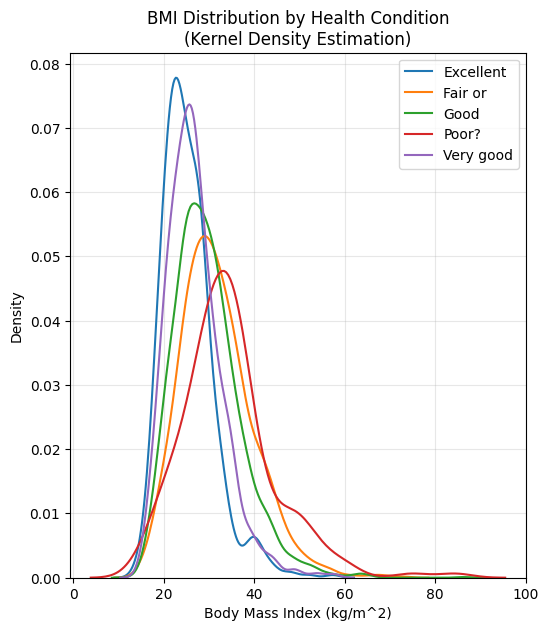

In [11]:
fig = plt.figure(figsize = (20, 15))

# Kernel Density Plot by Health Condition
ax1 = plt.subplot(2, 3, 1)
colors = plt.cm.Set1(np.linspace(0, 2, len(valid_cases['GeneralHealthCondition'].unique())))

for i in sorted(valid_cases['GeneralHealthCondition'].unique()):
    condition_data = valid_cases[valid_cases['GeneralHealthCondition'] == i]['BodyMassIndexKgm2']
    sns.kdeplot(condition_data, ax=ax1, label=i)
ax1.set_title('BMI Distribution by Health Condition\n(Kernel Density Estimation)')
ax1.set_xlabel('Body Mass Index (kg/m^2)')
ax1.set_ylabel('Density')
ax1.legend()
ax1.grid(True, alpha=0.3)

In [12]:
print('KEY FINDINGS:\n')

conditions = sorted(valid_cases['GeneralHealthCondition'].unique())
n_conditions = len(conditions)
mean_bmis = valid_cases.groupby('GeneralHealthCondition')['BodyMassIndexKgm2'].mean().sort_values()

print(f'1. Data Completeness:')
print(f'   - Analysis includes {len(valid_cases):,} participants with complete data')
print(f'   - This represents {len(valid_cases)/len(data)*100:.1f}% of the total NHANES data')
print(f'   - {n_conditions} health condition categories were included in the analysis')

print(f'\n2. BMI Distribution Patterns:')
print(f'   - Overall mean BMI: {valid_cases["BodyMassIndexKgm2"].mean():.2f} kg/m^2')
print(f'   - BMI range across health conditions: {valid_cases["BodyMassIndexKgm2"].min()} - {valid_cases["BodyMassIndexKgm2"].max():.2f} kg/m^2')
print(f'   - Largest difference: {max(valid_cases["BodyMassIndexKgm2"] - valid_cases["BodyMassIndexKgm2"].min()):.2f} kg/m^2 between conditions')

print(f'\n3 Health Condition Rankings (by mean BMI):')
for i, (condition, mean_bmi) in enumerate(mean_bmis.items(), 1):
    print(f'   {i}. {condition} ({mean_bmi:.2f} kg/m^2)')

KEY FINDINGS:

1. Data Completeness:
   - Analysis includes 5,892 participants with complete data
   - This represents 70.4% of the total NHANES data
   - 5 health condition categories were included in the analysis

2. BMI Distribution Patterns:
   - Overall mean BMI: 28.98 kg/m^2
   - BMI range across health conditions: 13.2 - 86.20 kg/m^2
   - Largest difference: 73.00 kg/m^2 between conditions

3 Health Condition Rankings (by mean BMI):
   1. Excellent (25.29 kg/m^2)
   2. Very good (26.81 kg/m^2)
   3. Good (29.60 kg/m^2)
   4. Fair or (31.72 kg/m^2)
   5. Poor? (34.25 kg/m^2)


Based on my observations, it appears that those who reported "Excellent" health also had a lower average BMI than those who reported "Poor?" health. This would be the expected relationship between the two variables. This potentially validates self-reporting instruments. 

## Problem 3 
We showed that the mean and median could be discovered by minimizing various kinds of loss functions; this is what machine learning is. To make a prediction $\hat{y}(z)$ of $Y$ when $X=z$, minimize the mean squared error:
$$
MSE(\hat{y}(z)) = \dfrac{1}{N} \sum_{i=1}^N \left\lbrace y_i - \hat{y}(z) \right\rbrace^2 \frac{1}{h}k\left(\frac{z-x_i}{h}\right)
$$
Show that the solution to this problem is the LCLS/Naradaya-Watson estimator.

Let:
$$w_i(z) = \frac{1}{h}k\left(\frac{z - x_i}{h}\right)$$

So the function becomes:

$$
MSE(\hat{y}(z)) = \frac{1}{N} \sum_{i=1}^N \{y_i - \hat{y}(z)\}^2 w_i(z)
$$

Take the derivative with respect to $\hat{y}(z)$:

$$
\frac{\partial}{\partial\hat{y}(z)}MSE(\hat{y}(z)) = \frac{\partial}{\partial\hat{y}(z)}\left[\frac{1}{N} \sum_{i=1}^N\{y_i - \hat{y}()z\}^2w_i(z)\right]
$$

$$
= \frac{1}{N} \sum_{i=1}^N w_i(z) \frac{\partial}{\partial\hat{y}(z)}\left[\{y_i - \hat{y}(z)\}^2\right]
$$

$$
= \frac{1}{N} \sum_{i=1}^N w_i(z) * 2\{y_i - \hat{y}(z)\} * (-1)
$$

$$
\frac{-2}{N} \sum_{i=1}^N w_i(z)\{y_i - \hat{y}(z)\}
$$


Set the derivative equal to zero:

$$
\frac{-2}{N} \sum_{i=1}^N w_i(z)\{y_i - \hat{y}(z)\} = 0
$$

$$
\sum_{i=1}^N w_i(z)\{y_i - \hat{y}(z)\} = 0
$$

Expand and solve for $\hat{y}(z)$

$$
\sum_{i=1}^N w_i(z)y_i - \sum_{i=1}^N w_i(z)\hat{y}(z) = 0
$$

$$
\sum_{i=1}^N w_i(z)y_i - \hat{y}(z)\sum_{i=1}^N w_i(z) = 0
$$

$$
\sum_{i=1}^N w_i(z)y_i = \hat{y}(z)\sum_{i=1}^N w_i(z)
$$

Therefore:

$$
\hat{y}(z) = \frac{\sum_{i=1}^N w_i(z)y_i}{\sum_{i=1}^N w_i(z)}
$$

Substitute back the definition of weights:

$$
\hat{y}(z) = \frac{\sum_{i=1}^N\frac{1}{h}k(\frac{z - x_i}{h})y_i}{\sum_{i=1}^N\frac{1}{h}k(\frac{z - x_i}{h})}
$$

The $\frac{1}{h}$ terms cancel out:

$$
\hat{y}(z) = \frac{\sum_{i=1}^N k(\frac{z - x_i}{h})y_i}{\sum_{i=1}^N k(\frac{z - x_i}{h})}
$$

The Nadayara-Watson Estimator is given by:

$$
\hat{g}(x) = \frac{\sum_{i=1}^N K(\frac{x - x_i}{h})y_i}{\sum_{i=1}^N K(\frac{x - x_i}{h})}
$$

So, reducing the MSE is the same as the LCLS/Nadayara Estimator. This means that minimizing the mean squared error natrually leads to kernel regression. 

## Problem 4
- **Write a class or set of functions that implement the LCLS/Naradaya-Watson estimator, using the Silverman plug-in estimate for the conditioning variable $X$ as the bandwidth.**

- **From one of the course data sets, find two numeric variables of interest, analyze their relationship with the the LCLS/Naradaya-Watson estimator, and discuss your results.**


In [ ]:
class NadarayaWatsonEstimator:
    def __init__(self):
        self.X_train = None
        self.y_train = None
        self.h = None

    def gaussian_kernel(self, u):
        return (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * u**2)

    def silverman_bandwidth(self, X):
        n = len(X)
        sigma = np.std(X, ddof=1)
        return 1.06 * sigma * (n ** (-1/5))

    def fit(self, X, y):
        remove_nan = ~(np.isnan(X) | np.isnan(y))
        self.X_train = X[remove_nan]
        self.y_train = y[remove_nan]

        self.h = self.silverman_bandwidth(self.X_train)

        print(f'Bandwidth: {self.h:.4f}')
        print(f'Training Obervervations: {len(self.X_train)}')

    def predict(self, X_new):
        predictions = np.zeros(len(X_new))

        for i, x in enumerate(X_new):
            u = (x - self.X_train) / self.h
            weights = self.gaussian_kernel(u)
            numerator = np.sum(weights * self.y_train)
            denominator = np.sum(weights)

            predictions[i] = numerator / denominator

        return predictions

    def score(self, X_test, y_test):
        y_pred = self.predict(X_test)
        return r2_score(y_test, y_pred)

In [ ]:
def silverman_bandwidth(X):
    n = len(X)
    std = np.std(X, ddof=1)
    iqr = np.quantile(X, 0.75) - np.quantile(X, 0.25)
    sigma = min(std, iqr / 1.34)
    return 1.06 * sigma * n ** (-0.2)

def gaussian_kernal(u):
    return np.exp(-0.5 * u**2) / np.sqrt(2 * np.pi)

def nadaraya_watson(X, Y, x_new):
    X = np.asarray(X)
    Y = np.asarray(Y)
    h = silverman_bandwidth(X)

    predictions = np.zeros(len(x_new))

    for i, x in enumerate(x_new):
        u = (x - X) / h
        weights = gaussian_kernal(u)
        numerator = np.sum(weights * Y)
        denominator = np.sum(weights)

        predictions[i] = numerator / denominator

    return predictions


In [ ]:
X_var = 'AgeInYearsAtScreening'
Y_var = 'SystolicBloodPres1StRdgMmHg'

print(f'Analyzing: {X_var} vs. {Y_var}')

data_analysis = data[[X_var, Y_var]].dropna()
print(f'Total Observations: {len(data_analysis)}')

X = data_analysis[X_var].values
Y = data_analysis[Y_var].values

print(f'Age Range: {X.min():.1f} - {X.max():.1f} years')
print(f'Systolic Blood Pressure Range: {Y.min():.1f} - {Y.max():.1f} mmHg')

Analyzing: AgeInYearsAtScreening vs. SystolicBloodPres1StRdgMmHg
Total Observations: 6302
Age Range: 8.0 - 80.0 years
Systolic Blood Pressure Range: 72.0 - 228.0 mmHg


In [86]:
nw = NadarayaWatsonEstimator()
nw.fit(X, y)

X_grid = np.linspace(X.min(), X.max(), 100)
y_pred = nw.predict(X_grid)

r2_nw = nw.score(X, y)
print(f'Nadarata-Waston R^2: {r2_nw:.4f}')

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X.reshape(-1, 1), y)
r2_linear = lr.score(X.reshape(-1, 1), y)
print(f'Linear Regression R^2: {r2_linear:.4f}')
print(f'Improvement: {r2_nw - r2_linear:.4f}')


Bandwidth: 4.1784
Training Obervervations: 6302
Nadarata-Waston R^2: 0.3825
Linear Regression R^2: 0.3793
Improvement: 0.0032


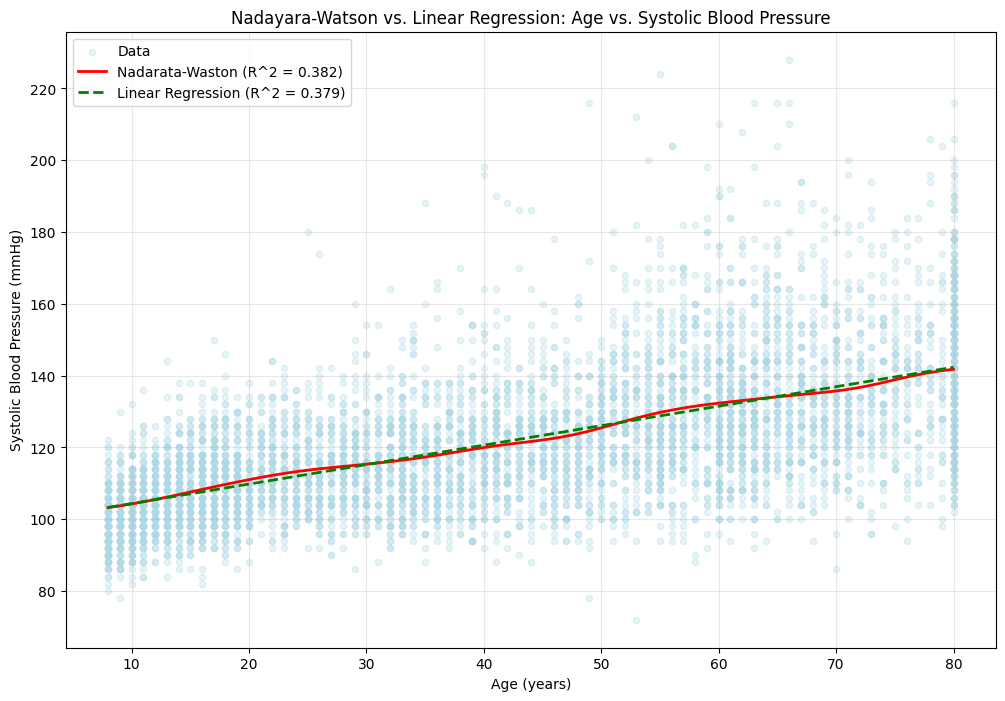

In [87]:
plt.figure(figsize = (12, 8))

plt.scatter(X, y, alpha = 0.3, s = 20, color = 'lightblue', label = 'Data')

plt.plot(X_grid, y_pred, 'red', linewidth = 2, label = f'Nadarata-Waston (R^2 = {r2_nw:.3f})')

y_linear = lr.predict(X_grid.reshape(-1, 1))
plt.plot(X_grid, y_linear, 'green', linewidth = 2, linestyle = '--', 
         label = f'Linear Regression (R^2 = {r2_linear:.3f})')

plt.xlabel('Age (years)')
plt.ylabel("Systolic Blood Pressure (mmHg)")
plt.title("Nadayara-Watson vs. Linear Regression: Age vs. Systolic Blood Pressure")
plt.legend()
plt.grid(True, alpha = 0.3)
plt.show()

## Problem 5 
- In any of the available data sets, investigate the relationships between pairs of variables $(X,Y)$ with a scatterplot and CEF (for example, price on area)
- Is this relationship plausibly causal, or are there missing variables that might explain at least part of the relationship between your variables? These can be "conceptual" rather than "practical"; for example, 'talent' or 'grit' probably explain education outcomes, but are almost impossible to measure. We are asking whether there are hypothetical **threats to causal identification** of the effect of $X$ on $Y$.
- Explain how, regardless of the threat to causal identification, you can still use your model to predict $Y$ given $X$, as long as you don't intervene in the system to control the outcome